In [ ]:
!pip install transformers

In [ ]:
!pip install underthesea

In [ ]:
from underthesea import sent_tokenize, word_tokenize
import time
import copy, json

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
%matplotlib inline


In [ ]:
with open('train_data.json') as train_data_json:
  jtrain_data = json.load(train_data_json)

print(type(jtrain_data))
print(*jtrain_data[0:6], sep='\n')

<class 'list'>
{'doc_id': '23351113', 'sent_id': 1, 'sentence': 'Ảnh minh họa Thứ trưởng Bộ GD&ĐT Nguyễn Thị Nghĩa đã có ý kiến về vấn đề này.', 'spos': [311, 388], 'entity_1': {'text': 'Bộ GD&ĐT', 'pos': [24, 32]}, 'entity_2': {'text': 'Nguyễn Thị Nghĩa', 'pos': [33, 49]}, 'label': 'AFFILIATION'}
{'doc_id': '23351113', 'sent_id': 2, 'sentence': 'Ông Nguyễn Tùng Lâm Sắp tới, Bộ GD&ĐT sẽ tăng cường thanh, kiểm tra để có biện pháp chấn chỉnh việc thực hiện quy định Điều lệ của Ban đại diện cha mẹ học sinh.', 'spos': [894, 1054], 'entity_1': {'text': 'Nguyễn Tùng Lâm', 'pos': [4, 19]}, 'entity_2': {'text': 'Bộ GD&ĐT', 'pos': [29, 37]}, 'label': 'OTHERS'}
{'doc_id': '23351113', 'sent_id': 3, 'sentence': 'Cũng theo Thứ trưởng Nguyễn Thị Nghĩa , trước những biến tướng như hiện tại, Bộ GD&ĐT nghiên cứu có thể bỏ quy định này để tránh hiện tượng lách luật.', 'spos': [1220, 1370], 'entity_1': {'text': 'Nguyễn Thị Nghĩa', 'pos': [21, 37]}, 'entity_2': {'text': 'Bộ GD&ĐT', 'pos': [77, 85]}, 'labe

In [ ]:
with open('dev_data.json') as dev_data_json:
  jdev_data = json.load(dev_data_json)

print(type(jdev_data))
print(*jdev_data[0:6], sep='\n')

<class 'list'>
{'doc_id': '23351996', 'sent_id': 1, 'sentence': "U16 Việt Nam dội 'mưa gôn' vào lưới Mông Cổ Không nằm ngoài dự đoán, U16 Việt Nam đã có chiến thắng dễ dàng trước U16 Mông Cổ .", 'spos': [0, 127], 'entity_1': {'text': 'U16 Việt Nam', 'pos': [0, 12]}, 'entity_2': {'text': 'Mông Cổ', 'pos': [36, 43]}, 'label': 'OTHERS'}
{'doc_id': '23351996', 'sent_id': 2, 'sentence': "U16 Việt Nam dội 'mưa gôn' vào lưới Mông Cổ Không nằm ngoài dự đoán, U16 Việt Nam đã có chiến thắng dễ dàng trước U16 Mông Cổ .", 'spos': [0, 127], 'entity_1': {'text': 'U16 Việt Nam', 'pos': [0, 12]}, 'entity_2': {'text': 'U16 Việt Nam', 'pos': [69, 81]}, 'label': 'OTHERS'}
{'doc_id': '23351996', 'sent_id': 3, 'sentence': "U16 Việt Nam dội 'mưa gôn' vào lưới Mông Cổ Không nằm ngoài dự đoán, U16 Việt Nam đã có chiến thắng dễ dàng trước U16 Mông Cổ .", 'spos': [0, 127], 'entity_1': {'text': 'U16 Việt Nam', 'pos': [0, 12]}, 'entity_2': {'text': 'U16 Mông Cổ', 'pos': [114, 125]}, 'label': 'OTHERS'}
{'doc_id': 

In [ ]:
train_label_dic={}

for i in jtrain_data:
  if i['label'] not in train_label_dic:
    train_label_dic[i['label']]=0
  else :
    train_label_dic[i['label']]+=1
print(train_label_dic)

{'AFFILIATION': 41, 'OTHERS': 95, 'LOCATED': 82, 'PART_WHOLE': 23, 'PERSONAL_SOCIAL': 5}


In [ ]:
dev_label_dic={}

for i in jdev_data:
  if i['label'] not in dev_label_dic:
    dev_label_dic[i['label']]=0
  else :
    dev_label_dic[i['label']]+=1
print(dev_label_dic)

{'OTHERS': 25, 'AFFILIATION': 5, 'PART_WHOLE': 1, 'PERSONAL_SOCIAL': 5, 'LOCATED': 16}


In [ ]:
import json
from collections import namedtuple

data_train = train_label_dic
train_data = json.dumps(data_train)

data_dev = dev_label_dic
dev_data = json.dumps(data_dev)
train = json.loads(train_data, object_hook=lambda d: namedtuple('X', d.keys())(*d.values()))
dev = json.loads(dev_data, object_hook=lambda d: namedtuple('X', d.keys())(*d.values()))
print(train.AFFILIATION)


41


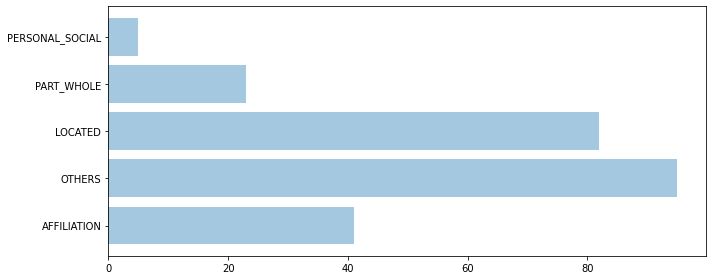

In [ ]:
names = ['AFFILIATION','OTHERS','LOCATED',
         'PART_WHOLE', 'PERSONAL_SOCIAL']

values = [train.AFFILIATION, train.OTHERS, train.LOCATED, train.PART_WHOLE, train.PERSONAL_SOCIAL]

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
yvals = range(len(names))
ax.barh(yvals, values, align='center', alpha=0.4)
plt.yticks(yvals,names)
plt.tight_layout()

plt.show()


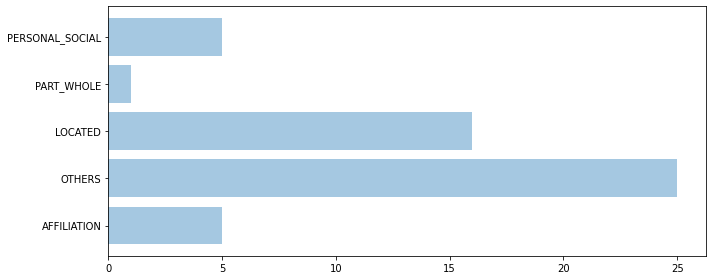

In [ ]:
names = ['AFFILIATION','OTHERS','LOCATED',
         'PART_WHOLE', 'PERSONAL_SOCIAL']

values = [dev.AFFILIATION, dev.OTHERS, dev.LOCATED, dev.PART_WHOLE, dev.PERSONAL_SOCIAL]

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
yvals = range(len(names))
ax.barh(yvals, values, align='center', alpha=0.4)
plt.yticks(yvals,names)
plt.tight_layout()

plt.show()


In [ ]:
flags = {
    'pb_emb_layer_lst': [10,11,12,13],             # danh sách các layer mà ta sẽ lấy embedding. từ 1 -> 13 cho phobert_base, 1 -> 25 cho phobert_large. 
                                                   # layer số 1 là initial embeddin
    'phobert_num_epochs': 3,    # num epoch of fintune phobert. after this epoch, we will freeze phobert layer. 0 mean no finetune.
    
    # implemented
    'total_epochs': 100,       #
    'batch_size': 16,        # 8, 16, 64
	
    'dropout1_rate': 0.6,
    'out_linear1': 1024,
    'dropout2_rate': 0.2,

    'clip_grad_norm_rate': 5.0,
	

    'linear_lr': 0.00001,
    'linear_lr_schedule_epoch': 6,
    'linear_lr_schedule_rate': 0.9,
    'linear_weight_decay': 0.15,
	
    #
    'linear_betas': (0.9, 0.999),
    'linear_eps': 1e-6,
	
    'seed': 5,
    'log_batch': 30,

}

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset

from transformers import AutoModel, AutoTokenizer, RobertaForSequenceClassification, AdamW

In [ ]:
pb_tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")

Downloading:   0%|          | 0.00/557 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/874k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
def my_word_tokenize(word_tokenize_lst, tokens_non_space_pos_lst, split_token_index, split_pos, sentence):

    '''
    word_tokenize_lst: word_tokenize_lst cần được sửa
    tokens_non_space_pos_lst: vị trí pos indice của mọi token trong word_tokenize_lst đối với câu không có space
    split_token_index: index của token cần được tách trong word_tokenize_lst
    sentence: sentence gốc có space
    split_pos: vị trí (NON SPACE) đối với câu (tại vị trí này ta sẽ tách token cần tách thành 2 phần, từ đầu token tới vị trí này,
    và từ vị trí này đến hết token)
    vị trí này sẽ nằm giữa đầu vs cuối của token)
    ..... vitri_dau_token  vitri_tach_token   vitri_cuoi_token ...
    '''

    new_word_tokenize_lst = []
    new_tokens_non_space_pos_lst = []

    for itk, tk in enumerate(word_tokenize_lst):

        if itk != split_token_index:
            sent_non_space = ''.join(sentence.split())   # remove all space from original sentence
            token_non_space = ''.join(tk.split())  # remove all space from current tk
            token_non_space_pos = tokens_non_space_pos_lst[itk]
                
            new_word_tokenize_lst.append(tk)  # tk with space
            new_tokens_non_space_pos_lst.append(copy.deepcopy(tokens_non_space_pos_lst[itk]))  # non space pos

        
        
        else:   # token cần tách
            token_space = copy.deepcopy(word_tokenize_lst[split_token_index])  

            sent_non_space = ''.join(sentence.split()) 
            token_non_space = ''.join(token_space.split())  

            token_non_space_pos = tokens_non_space_pos_lst[split_token_index] 

            token_head_non_space = sent_non_space[token_non_space_pos[0]:split_pos]   
            token_tail_non_space = sent_non_space[split_pos:token_non_space_pos[1]] 


            subtoken_lst = token_space.split()

            
            num_space_in_token_space = 0
            for ctk in token_space:
                if ctk.isspace():
                    num_space_in_token_space += 1
      
            sub_token_head_lst = []

            for subtoken in subtoken_lst:          
                sub_token_head_lst.append(subtoken)  
                if ''.join(sub_token_head_lst) == token_head_non_space:   
                    break
                
            sub_token_tail_lst = subtoken_lst[len(sub_token_head_lst):]   # [C, D]

            new_word_tokenize_lst.append(' '.join(sub_token_head_lst))

            token_head_non_space_pos_start = token_non_space_pos[0]
            token_head_non_space_pos_end = token_head_non_space_pos_start + sum([len(tmp) for tmp in sub_token_head_lst])

       
            new_tokens_non_space_pos_lst.append([token_head_non_space_pos_start, token_head_non_space_pos_end])
            new_word_tokenize_lst.append(' '.join(sub_token_tail_lst))

            token_tail_non_space_pos_start = split_pos
            token_tail_non_space_pos_end = token_tail_non_space_pos_start + sum([len(tmp) for tmp in sub_token_tail_lst])

          
            new_tokens_non_space_pos_lst.append([token_tail_non_space_pos_start, token_tail_non_space_pos_end])
                

    return new_word_tokenize_lst, new_tokens_non_space_pos_lst

In [ ]:
def get_entity_index_in_underthesea_word_tokenize(sentence, word_tokenize_lst, entity):
    
    entity_text = entity['text']
    entity_pos = entity['pos']

    # đếm khoảng trắng từ đầu câu đến entity start_pos
    count_to_estart = 0
    for c in sentence[:entity_pos[0]]:
        if c.isspace():
            count_to_estart += 1
    new_estart_pos = entity_pos[0] - count_to_estart

    # đếm khoảng trắng từ đầu câu đến entity end_pos
    count_to_eend = 0
    for c in sentence[:entity_pos[1]]:
        if c.isspace():
            count_to_eend += 1
    new_eend_pos = entity_pos[1] - count_to_eend


    pre_tkend_pos = 0

    found_start = False
    found_end = False

    start_index = None
    end_index = None
    
    
    sent_non_space = ''.join(sentence.split()) 
    tokens_non_space_pos_lst = []  


    for itk, tk in enumerate(word_tokenize_lst):
        # tìm pos của từng token trong câu segment
        tkstart_pos = pre_tkend_pos 
        tkend_pos = tkstart_pos + sum([len(tmp) for tmp in tk.split()])

        token_non_space = ''.join(tk.split())

        tokens_non_space_pos_lst.append([tkstart_pos, tkend_pos])

        # cập nhật pre_tkend_pos
        pre_tkend_pos = tkend_pos


        if tkstart_pos == new_estart_pos:
            found_start = True
            start_index = copy.deepcopy(itk)

        if tkend_pos == new_eend_pos:
            found_end = True
            end_index = copy.deepcopy(itk)

        if (tkstart_pos < new_estart_pos) and (new_estart_pos < tkend_pos):
            start_index = copy.deepcopy(itk)  

        if (tkstart_pos < new_eend_pos) and (new_eend_pos < tkend_pos):
            end_index = copy.deepcopy(itk) 

    
    entity_eids_lst = []
    new_word_tokenize_lst = []
    new_tokens_non_space_pos_lst = []

    if (found_start == True):
        new_word_tokenize_lst = copy.deepcopy(word_tokenize_lst)
        new_tokens_non_space_pos_lst = copy.deepcopy(tokens_non_space_pos_lst)

    if found_start == False:
        token_space = word_tokenize_lst[start_index]

        num_space_in_token_space = 0
        for ctk in token_space:
            if ctk.isspace():
                num_space_in_token_space += 1

     
        new_word_tokenize_lst, new_tokens_non_space_pos_lst = \
        my_word_tokenize(word_tokenize_lst, tokens_non_space_pos_lst, start_index, new_estart_pos, sentence)
        start_index = start_index + 1  # osi + 1
        end_index = end_index + 1


                
    if found_end == True:
        entity_eids_lst = list(range(start_index, (end_index+1)))


    if found_end == False:
        new_word_tokenize_lst, new_tokens_non_space_pos_lst = \
        my_word_tokenize(copy.deepcopy(new_word_tokenize_lst), copy.deepcopy(new_tokens_non_space_pos_lst), end_index, new_eend_pos, sentence)

        entity_eids_lst = list(range(start_index, (end_index+1)))



    entity_text_no_space = ''.join(entity_text.split()) 
    entity_subtoken_lst = new_word_tokenize_lst[entity_eids_lst[0]:(entity_eids_lst[-1]+1)]

    entity_singleword_lst = []
    for entity_subtoken in entity_subtoken_lst:
        entity_singleword_lst.extend(entity_subtoken.split())

    entity_pos_no_space = [new_estart_pos, new_eend_pos]

    return new_word_tokenize_lst, entity_eids_lst, entity_pos_no_space


In [ ]:
def add_word_tokenize_and_entity_index(jdata, train_or_dev):

    new_jdata = []

    for sentif in jdata:

        word_tokenize_lst = word_tokenize(sentif['sentence'])

        new_word_tokenize_lst_1, entity_1_eids_lst, entity_1_pos_no_space = \
        get_entity_index_in_underthesea_word_tokenize(sentif['sentence'], word_tokenize_lst, sentif['entity_1'])

        new_word_tokenize_lst_2, entity_2_eids_lst, entity_2_pos_no_space = \
        get_entity_index_in_underthesea_word_tokenize(sentif['sentence'], copy.deepcopy(new_word_tokenize_lst_1), sentif['entity_2'])
        



        new_sentif = copy.deepcopy(sentif)

        new_sentif['word_tokenize_lst'] = copy.deepcopy(new_word_tokenize_lst_2)
        new_sentif['entity_1']['pos_no_space'] = copy.deepcopy(entity_1_pos_no_space)
        new_sentif['entity_2']['pos_no_space'] = copy.deepcopy(entity_2_pos_no_space)


        new_jdata.append(copy.deepcopy(new_sentif))
    return new_jdata

In [ ]:
def get_entity_word_piece_index(bert_tokenize_lst, entity, sentence, input_ids, train_or_dev):

    entity_pos_no_space = entity['pos_no_space']

    sent_non_space = ''.join(sentence.split())

    found_start, found_end = None, None
    start_index, end_index = None, None

    pre_wpiend_pos = 0

  

    for iwpi, wpi in enumerate(bert_tokenize_lst):
        clean_wpi = wpi.replace('_', '')
        clean_wpi = clean_wpi.replace('@@', '')
  
        wpi_start_pos = copy.deepcopy(pre_wpiend_pos)
        wpi_end_pos = wpi_start_pos + len(clean_wpi)

        pre_wpiend_pos = copy.deepcopy(wpi_end_pos)

        if wpi_start_pos == entity_pos_no_space[0]:
            start_index = iwpi
            found_start = True

        if wpi_end_pos == entity_pos_no_space[1]:
            end_index = iwpi
            found_end = True
            break


   

    found_entity_text = ''.join(bert_tokenize_lst[start_index:(end_index+1)])
    found_entity_text = found_entity_text.replace('_', '')
    found_entity_text = found_entity_text.replace('@@', '')
    found_entity_text = found_entity_text.replace('▁', '')


    entity_text_no_space = ''.join(entity['text'].split())

    entity_wpi_ids_lst = list(range((start_index+1), (end_index+2)))


    tmp_ent_txt = ''

    for entity_wpi_id in entity_wpi_ids_lst:
      tmp_ent_txt += pb_tokenizer.decode([input_ids[entity_wpi_id]])
    
    tmp_ent_txt = tmp_ent_txt.replace(' ', '')
    tmp_ent_txt = tmp_ent_txt.replace('_', '')
    tmp_ent_txt = tmp_ent_txt.replace('@@', '')
    
    return entity_wpi_ids_lst

In [ ]:
def encode_label(sentence_label):
    label = -1
    if sentence_label == "LOCATED":
        label = 0
    elif sentence_label == "PART_WHOLE":
        label = 1
    elif sentence_label == "PERSONAL_SOCIAL":
        label = 2
    elif sentence_label == "AFFILIATION":
        label = 3
    elif sentence_label == "OTHERS":
        label = 4
    if label ==-1:
      print(sentence_label)
    return label

In [ ]:
jtrain_data = add_word_tokenize_and_entity_index(jtrain_data, 'train')

In [ ]:
print(jtrain_data[0])

{'doc_id': '23351113', 'sent_id': 1, 'sentence': 'Ảnh minh họa Thứ trưởng Bộ GD&ĐT Nguyễn Thị Nghĩa đã có ý kiến về vấn đề này.', 'spos': [311, 388], 'entity_1': {'text': 'Bộ GD&ĐT', 'pos': [24, 32], 'pos_no_space': [19, 26]}, 'entity_2': {'text': 'Nguyễn Thị Nghĩa', 'pos': [33, 49], 'pos_no_space': [26, 40]}, 'label': 'AFFILIATION', 'word_tokenize_lst': ['Ảnh', 'minh họa', 'Thứ trưởng', 'Bộ', 'GD&ĐT', 'Nguyễn Thị Nghĩa', 'đã', 'có', 'ý kiến', 'về', 'vấn đề', 'này', '.']}


In [ ]:
train_pb_input_ids = []
train_pb_attention_masks = []
train_pb_entity_1_eids = []
train_pb_entity_2_eids = []
train_labels = []

# Do entity_eids của các entity trong các câu không cùng chiều dài nên ta cần chuyển về cùng chiều dài thì mới biến thành tensor được
# để chuyển về cùng chiều dài ta sẽ pad các eids ngắn hơn bằng -2.
# vì eids phải >= 1 nên để số < 0 sẽ không sợ nhầm và ta chỉ thêm vào bên phải. 
# >= 1 vì lúc tìm eids đã tính <s> nên đã +1 sẵn nên min = 1
# giả sử 1 entity_eids chỉ có chiều dài max là 30
pad_ent_eid = -2
max_len_ent_eid = 30


jtrain_data_use = copy.deepcopy(jtrain_data)

for isentif, sentif in enumerate(jtrain_data_use):
         
    pb_input_sent = u" ".join([tk.replace(" ", "_") for tk in sentif['word_tokenize_lst']])

    pb_encode_dict = pb_tokenizer(pb_input_sent, add_special_tokens=True, padding='max_length', max_length=192)

    pb_tokenize_lst = pb_tokenizer.tokenize(pb_input_sent)
   
    pb_entity_1_eids = get_entity_word_piece_index(pb_tokenize_lst, sentif['entity_1'], sentif['sentence'], pb_encode_dict['input_ids'], 'train')
    pb_entity_2_eids = get_entity_word_piece_index(pb_tokenize_lst, sentif['entity_2'], sentif['sentence'], pb_encode_dict['input_ids'], 'train')

    # pad
   
    pb_entity_1_eids += [pad_ent_eid] * (max_len_ent_eid - len(pb_entity_1_eids))
    pb_entity_2_eids += [pad_ent_eid] * (max_len_ent_eid - len(pb_entity_2_eids))
        
        
    train_pb_input_ids.append(copy.deepcopy(pb_encode_dict['input_ids']))
    train_pb_attention_masks.append(copy.deepcopy(pb_encode_dict['attention_mask']))
    train_pb_entity_1_eids.append(copy.deepcopy(pb_entity_1_eids))
    train_pb_entity_2_eids.append(copy.deepcopy(pb_entity_2_eids))
   
    train_labels.append(copy.deepcopy(encode_label(sentif['label'])))

In [ ]:
# convert to tensor
train_pb_input_ids = torch.tensor(train_pb_input_ids)
train_pb_attention_masks = torch.tensor(train_pb_attention_masks)
train_pb_entity_1_eids = torch.tensor(train_pb_entity_1_eids)
train_pb_entity_2_eids = torch.tensor(train_pb_entity_2_eids)
train_labels = torch.tensor(train_labels)

In [ ]:
#dev
jdev_data = add_word_tokenize_and_entity_index(jdev_data, 'dev')

In [ ]:
print(jdev_data[0])

{'doc_id': '23351996', 'sent_id': 1, 'sentence': "U16 Việt Nam dội 'mưa gôn' vào lưới Mông Cổ Không nằm ngoài dự đoán, U16 Việt Nam đã có chiến thắng dễ dàng trước U16 Mông Cổ .", 'spos': [0, 127], 'entity_1': {'text': 'U16 Việt Nam', 'pos': [0, 12], 'pos_no_space': [0, 10]}, 'entity_2': {'text': 'Mông Cổ', 'pos': [36, 43], 'pos_no_space': [28, 34]}, 'label': 'OTHERS', 'word_tokenize_lst': ['U16', 'Việt Nam', 'dội', "'", 'mưa', 'gôn', "'", 'vào', 'lưới', 'Mông Cổ', 'Không', 'nằm', 'ngoài', 'dự đoán', ',', 'U16', 'Việt Nam', 'đã', 'có', 'chiến thắng', 'dễ dàng', 'trước', 'U16', 'Mông Cổ', '.']}


In [ ]:
dev_pb_input_ids = []
dev_pb_attention_masks = []
dev_pb_entity_1_eids = []
dev_pb_entity_2_eids = []
dev_labels = []

pad_ent_eid = -2
max_len_ent_eid = 30



jdev_data_use = copy.deepcopy(jdev_data)


for isentif, sentif in enumerate(jdev_data_use):


  pb_input_sent = u" ".join([tk.replace(" ", "_") for tk in sentif['word_tokenize_lst']])

  pb_encode_dict = pb_tokenizer(pb_input_sent, add_special_tokens=True, padding='max_length', max_length=192)
  pb_tokenize_lst = pb_tokenizer.tokenize(pb_input_sent)

  pb_entity_1_eids = get_entity_word_piece_index(pb_tokenize_lst, sentif['entity_1'], sentif['sentence'], pb_encode_dict['input_ids'], 'dev')
  pb_entity_2_eids = get_entity_word_piece_index(pb_tokenize_lst, sentif['entity_2'], sentif['sentence'], pb_encode_dict['input_ids'], 'dev')

  # pad
  
  pb_entity_1_eids += [pad_ent_eid] * (max_len_ent_eid - len(pb_entity_1_eids))
  pb_entity_2_eids += [pad_ent_eid] * (max_len_ent_eid - len(pb_entity_2_eids))
  
  dev_pb_input_ids.append(copy.deepcopy(pb_encode_dict['input_ids']))
  dev_pb_attention_masks.append(copy.deepcopy(pb_encode_dict['attention_mask']))
  dev_pb_entity_1_eids.append(copy.deepcopy(pb_entity_1_eids))
  dev_pb_entity_2_eids.append(copy.deepcopy(pb_entity_2_eids))
  dev_labels.append(copy.deepcopy(encode_label(sentif['label'])))

In [ ]:
# convert to tensor

dev_pb_input_ids = torch.tensor(dev_pb_input_ids)
dev_pb_attention_masks = torch.tensor(dev_pb_attention_masks)
dev_pb_entity_1_eids = torch.tensor(dev_pb_entity_1_eids)
dev_pb_entity_2_eids = torch.tensor(dev_pb_entity_2_eids)
dev_labels = torch.tensor(dev_labels)

In [ ]:
class BERTModel(nn.Module):
    def __init__(self, emb_layer_lst):
        super().__init__()
        self.bert_model = AutoModel.from_pretrained("vinai/phobert-base", output_hidden_states=True)
          
        self.emb_layer_lst = emb_layer_lst
        self.sent_emb_len, self.wpi_emb_len = self.calculate_len_embedding()



    def forward(self, b_input_ids, b_attention_mask, b_entity_1_eids, b_entity_2_eids):
        outputs = self.bert_model(b_input_ids, b_attention_mask)

        hidden_states = outputs[2]

        b_sent_final_embedding = self.get_sent_final_vector(hidden_states, b_entity_1_eids, b_entity_2_eids)

        return b_sent_final_embedding

    def get_sent_final_vector(self, hidden_states, b_entity_1_eids, b_entity_2_eids):
      
            
        sent_final_embedding_lst = []

        for isent in range(len(b_entity_1_eids)):   # từng câu 1 trong batch

            
            entity_1_final_vector = self.get_entity_embedding_vector(hidden_states, b_entity_1_eids[isent], isent)
            entity_2_final_vector = self.get_entity_embedding_vector(hidden_states, b_entity_2_eids[isent], isent)

            entity_sum_vector = torch.add(entity_1_final_vector, entity_2_final_vector)
            entity_mul_vector = torch.mul(entity_1_final_vector, entity_2_final_vector)
            entity_abs_sub_vector = torch.abs(torch.sub(entity_1_final_vector, entity_2_final_vector))

            sent_final_vector = torch.cat((entity_1_final_vector, entity_2_final_vector, entity_mul_vector, entity_sum_vector, entity_abs_sub_vector))

            sent_final_embedding_lst.append(sent_final_vector)


        
        sent_final_embedding_lst = torch.stack(sent_final_embedding_lst)  
        return sent_final_embedding_lst
                

    def get_entity_embedding_vector(self, hidden_states, entity_eids, isent):
        entity_wpi_embedding_lst = []
        for ient_eid, entity_eid in enumerate(entity_eids):               

            if entity_eid < 0: 
                break

            wpi_final_vector = None
            wpi_embedding_lst = []
            # thu thập mọi vector trong các layer muốn lấy của 1 word piece
            for emb_layer in self.emb_layer_lst:          # từng layer mà ta muốn lấy embedding
                wpi_embedding_lst.append(hidden_states[emb_layer-1][isent][entity_eid])
                
            # xử lý embedding thuộc các layer khác nhau của 1 word piece -sum
            wpi_embedding_lst = torch.stack(wpi_embedding_lst)  # convert from 'python list of tensors' to 'pytorch tensor of tensers'
            wpi_final_vector = torch.sum(wpi_embedding_lst, dim=0)   

          
            entity_wpi_embedding_lst.append(wpi_final_vector)
            

      
        # xử lý embedding của mọi word piece trong 1 entity - average_pooling
        entity_wpi_embedding_lst = torch.stack(entity_wpi_embedding_lst)  # convert from 'python list of tensors' to 'pytorch tensor of tensers'
        entity_final_vector = torch.mean(entity_wpi_embedding_lst, dim=0)
      
        return entity_final_vector



    #  tính len của vector đại diện cho câu
    def calculate_len_embedding(self):
        wpi_emb_len = 768
        sent_emb_len = wpi_emb_len * 5
        
        return sent_emb_len, wpi_emb_len

In [ ]:
class REClassifier(nn.Module):

    def __init__(self, flags):
        super().__init__()


        self.pb_model = BERTModel(flags['pb_emb_layer_lst'])
        pb_sent_emb_len = self.calculate_len_sent_embedding(flags['pb_emb_layer_lst'])

        self.final_sent_emb_len = pb_sent_emb_len


        self.flags = flags

        self.dropout1 = nn.Dropout(p=flags['dropout1_rate'])
        self.linear1 = nn.Linear(self.final_sent_emb_len, flags['out_linear1'])
        self.dropout2 = nn.Dropout(p=flags['dropout2_rate'])
        self.linear2 = nn.Linear(flags['out_linear1'], 5)



    def forward(self, pb_input_ids, pb_attention_masks, pb_entity_1_eids, pb_entity_2_eids):
        bert_sent_final_embedding = self.pb_model(pb_input_ids, pb_attention_masks, pb_entity_1_eids, pb_entity_2_eids)

        x = self.dropout1(bert_sent_final_embedding)
        x = self.linear1(x)
        x = self.dropout2(x)
        x = self.linear2(x)

        return x



    #  tính len của vector đại diện cho câu
    def calculate_len_sent_embedding(self, emb_layer_lst):
        wpi_emb_len = 768
        sent_emb_len = wpi_emb_len * 5


        return sent_emb_len

In [ ]:
train_dataset = TensorDataset(train_pb_input_ids, train_pb_attention_masks, train_pb_entity_1_eids, train_pb_entity_2_eids, train_labels)

In [ ]:
dev_dataset = TensorDataset(dev_pb_input_ids, dev_pb_attention_masks, dev_pb_entity_1_eids, dev_pb_entity_2_eids, dev_labels)

In [ ]:
import random
import numpy as np
import sklearn

In [ ]:
data=np.concatenate((train_pb_attention_masks.numpy(), train_pb_attention_masks.numpy(), train_pb_entity_1_eids.numpy(),train_pb_entity_2_eids.numpy()), axis=1)

In [ ]:
dev=np.concatenate((dev_pb_input_ids.numpy(), dev_pb_attention_masks.numpy(), dev_pb_entity_1_eids.numpy(),dev_pb_entity_2_eids.numpy()), axis=1)

In [ ]:
from sklearn.svm import LinearSVC
from sklearn import linear_model

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
svc = LinearSVC()

In [ ]:
svc.fit(data, train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [ ]:
svc_prediction=svc.predict(dev)

In [ ]:
svc_Accurancy= accuracy_score(dev_labels , svc_prediction)
svc_f1_score_macro=  f1_score(dev_labels, svc_prediction, average='macro')

In [ ]:
print('Accurancy score')
print(svc_Accurancy)
print('F1 score macro')
print(svc_f1_score_macro)

Accurancy score
0.3508771929824561
F1 score macro
0.18967668746454908


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data, train_labels)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_label_predict = knn.predict(dev)

In [ ]:
knn_Accurancy=accuracy_score(dev_labels , knn_label_predict)
knn_f1_score_macro =f1_score(dev_labels, knn_label_predict, average='macro')

In [ ]:
print('Accurancy score')
print(knn_Accurancy)
print('F1 score macro')
print(knn_f1_score_macro)

Accurancy score
0.47368421052631576
F1 score macro
0.27397047397047397


In [ ]:
del knn
del svc
del data
del dev

In [ ]:
def map_fn(flags, train_dataset, dev_dataset, save_path):
    ## Setup 

    # Sets a common random seed - both for initialization and ensuring graph is the same
    random.seed(flags['seed'])
    np.random.seed(flags['seed'])
    torch.manual_seed(flags['seed'])
    torch.cuda.manual_seed_all(flags['seed'])

    # GPU
    # If there's a GPU available...
    if torch.cuda.is_available():    
        # Tell PyTorch to use the GPU.    
        device = torch.device("cuda")
        print('There are %d GPU(s) available.' % torch.cuda.device_count())
        print('We will use the GPU:', torch.cuda.get_device_name(0))

    # If not...
    else:
        print('No GPU available, using the CPU instead.')
        device = torch.device("cpu")

  
  # Creates dataloaders, which load data in batches
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        sampler = torch.utils.data.RandomSampler(train_dataset),
        batch_size=flags['batch_size'])

    dev_loader = torch.utils.data.DataLoader(
        dev_dataset,
        sampler = torch.utils.data.SequentialSampler(dev_dataset),
        batch_size=flags['batch_size'])
  

    ## Network, optimizer, and loss function creation
    print('Loading...')
    rec_model = REClassifier(flags)
    rec_model.to(device)
 
    print('Finish')

    
    loss_fn = nn.CrossEntropyLoss()

    optimizer = AdamW(rec_model.parameters(), lr=flags['linear_lr'], betas=flags['linear_betas'], \
                      eps=flags['linear_eps'], weight_decay=flags['linear_weight_decay'])

    lambda2 = lambda epoch: float(flags['linear_lr_schedule_rate']) ** epoch
    scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda2)


    ## Trains
    rec_model.train()

    gobal_train_start = time.time()
    train_accuracy_score_history=[]
    
    dev_accuracy_score_history = []
    dev_f1_score_macro_history=[]
    dev_loss_history = []

    for epoch in range(flags['total_epochs']):
        print('\n\nStart training epoch: ', epoch)
        epoch_start_time = time.time()

        train_batch_step = 0
        train_loss = 0

        train_predict_lst = []
        train_target_lst = []

        for batch_num, batch in enumerate(train_loader):
            batch_start_time = time.time()


            pb_input_ids, pb_attention_masks, pb_entity_1_eids, pb_entity_2_eids, targets = \
                batch[0].to(device), batch[1].to(device), batch[2].to(device), batch[3].to(device), batch[4].to(device)

            # Acquires the network's best guesses at each class
            output = rec_model(pb_input_ids, pb_attention_masks, pb_entity_1_eids, pb_entity_2_eids)

            # Computes loss
            loss = loss_fn(output, targets) 
            train_loss += loss.item()
            optimizer.zero_grad()
            loss.backward()
            nn.utils.clip_grad_norm_(rec_model.parameters(), flags['clip_grad_norm_rate'])
            
            optimizer.step()

            if (train_batch_step % flags['log_batch'] == 0):
                duration = time.time() - batch_start_time
                print(duration, ' - epoch: ', epoch, ' - batch: ', train_batch_step, ' - current_batch_loss: ', loss.item(), ' - current lr: ', str(scheduler.get_last_lr()[0]))

            train_batch_step += 1

            train_predict_lst.append(torch.argmax(output, 1))
            train_target_lst.append(targets)
        

        print('\n\nFinish training epoch: ', epoch, 'after: ', (time.time() - epoch_start_time))
        
        train_predict_lst = torch.cat(train_predict_lst).to(torch.device("cpu"))
        train_target_lst = torch.cat(train_target_lst).to(torch.device("cpu"))
        train_accuracy = accuracy_score(list(train_target_lst), list(train_predict_lst))
        
        print('train-accuracy: ', train_accuracy)
        print('Avg train_loss per batch: ', train_loss/train_batch_step)

        if ((epoch + 1) % int(flags['linear_lr_schedule_epoch'])) == 0:
            scheduler.step()

        print('\nEvaluating on dev set...')
        eval_start_time = time.time()

        rec_model.eval()

        dev_loss = 0
        dev_batch_step = 0

        dev_predict_lst = []
        dev_target_lst = []

        
        for dev_batch_num, dev_batch in enumerate(dev_loader):
            pb_input_ids, pb_attention_masks, pb_entity_1_eids, pb_entity_2_eids, targets = \
                dev_batch[0].to(device), dev_batch[1].to(device), dev_batch[2].to(device), dev_batch[3].to(device), dev_batch[4].to(device)

            output = rec_model(pb_input_ids, pb_attention_masks, pb_entity_1_eids, pb_entity_2_eids)

            loss = loss_fn(output, targets)
            dev_loss += loss.item()
            dev_predict_lst.append(torch.argmax(output, 1))
            dev_target_lst.append(targets)

            dev_batch_step += 1
        
        dev_predict_lst = torch.cat(dev_predict_lst).to(torch.device("cpu"))
        dev_target_lst = torch.cat(dev_target_lst).to(torch.device("cpu"))

        dev_accuracy =  accuracy_score(list(dev_target_lst), list(dev_predict_lst))
        dev_f1_macro= f1_score(list(dev_target_lst), list(dev_predict_lst), average='macro')

        print('Finish eval epoch: ', epoch, ' after: ', (time.time() - eval_start_time))
        print('dev-accuracy: ', dev_accuracy)
        print('dev-f1-score-macro: ', dev_f1_macro)
        print('Avg dev_loss per batch: ', dev_loss/dev_batch_step)

        # save new better model
        root_model_save_path = save_path
        if (epoch == 0):
            print('SAVING MODEL AT EPOCH 0 ...')
            model_save_path = root_model_save_path + '/rec_model.bin'
            torch.save(rec_model.state_dict(), model_save_path)

        elif (dev_accuracy > max(dev_accuracy_score_history)):
            print('SAVING MODEL')
            model_save_path = root_model_save_path + '/rec_model.bin'
            torch.save(rec_model.state_dict(), model_save_path)
        
        elif (dev_f1_macro > max(dev_f1_score_macro_history)):
            print('SAVING MODEL')
            model_save_path = root_model_save_path + '/rec_model.bin'
            torch.save(rec_model.state_dict(), model_save_path)
        
        train_accuracy_score_history.append(train_accuracy)
        dev_accuracy_score_history.append(dev_accuracy)
        dev_f1_score_macro_history.append(dev_f1_macro)
        dev_loss_history.append(dev_loss/dev_batch_step)



    elapsed_train_time = time.time() - gobal_train_start
    print("Finished training. Train time was:", elapsed_train_time)

    return train_accuracy_score_history, dev_accuracy_score_history,dev_f1_score_macro_history, dev_loss_history
     

In [ ]:
import pathlib
save_path = './rec_model_save' 
pathlib.Path(save_path).mkdir(parents=False, exist_ok=True)

In [ ]:
train_accuracy_score_history, dev_accuracy_score_history,dev_f1_score_macro_history,dev_loss_history = map_fn(flags,train_dataset, dev_dataset, save_path)

There are 1 GPU(s) available.
We will use the GPU: Tesla K80
Loading...


Downloading:   0%|          | 0.00/518M [00:00<?, ?B/s]

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Finish


Start training epoch:  0
1.2595815658569336  - epoch:  0  - batch:  0  - current_batch_loss:  2.056205987930298  - current lr:  1e-05


Finish training epoch:  0 after:  16.817415952682495
train-accuracy:  0.36254980079681276
Avg train_loss per batch:  1.5416383519768715

Evaluating on dev set...
Finish eval epoch:  0  after:  1.285599708557129
dev-accuracy:  0.3157894736842105
dev-f1-score-macro:  0.17965517241379308
Avg dev_loss per batch:  1.5445303916931152
SAVING MODEL AT EPOCH 0 ...


Start training epoch:  1
1.020958423614502  - epoch:  1  - batch:  0  - current_batch_loss:  1.2805442810058594  - current lr:  1e-05


Finish training epoch:  1 after:  16.36397933959961
train-accuracy:  0.5776892430278885
Avg train_loss per batch:  1.0313782915472984

Evaluating on dev set...
Finish eval epoch:  1  after:  1.2868332862854004
dev-accuracy:  0.43859649122807015
dev-f1-score-macro:  0.3868027210884354
Avg dev_loss per batch:  1.5401591360569
SAVING MODEL


Start training epo

In [ ]:
dev_Accuracy=max(dev_accuracy_score_history)
dev_f1_macro=max(dev_f1_score_macro_history)


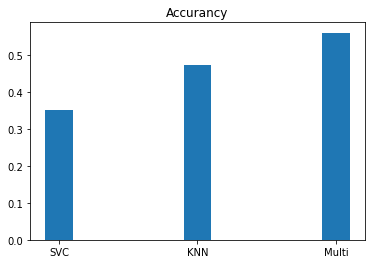

In [ ]:
label=["SVC","KNN","Multi"]
values=[svc_Accurancy,knn_Accurancy,dev_Accuracy]
plt.bar(label,values,width=0.2)
plt.title("Accurancy")
plt.show()

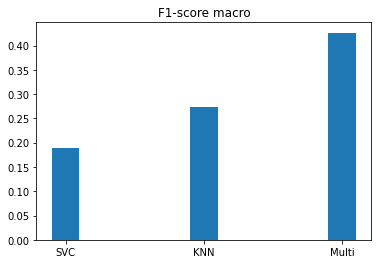

In [ ]:
label=["SVC","KNN","Multi"]
values=[svc_f1_score_macro,knn_f1_score_macro,dev_f1_macro]
plt.bar(label,values,width=0.2)
plt.title("F1-score macro")
plt.show()

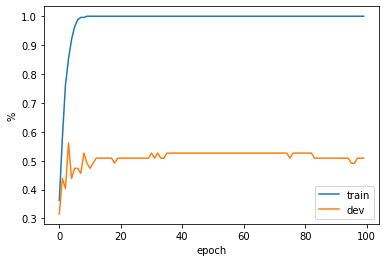

In [ ]:
total_epoch=flags['total_epochs']
epoch=[i for i in range(total_epoch)]

plt.figure()
plt.plot(epoch, train_accuracy_score_history, label='train')
plt.plot(epoch, dev_accuracy_score_history, label='dev')
plt.xlabel('epoch')
plt.ylabel('%')
plt.legend(loc='best')
plt.show()

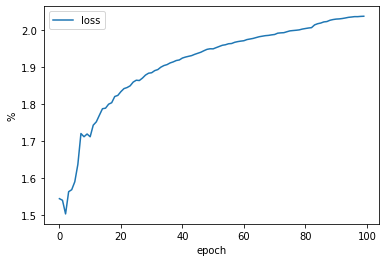

In [ ]:
plt.figure()
plt.plot(epoch, dev_loss_history, label='loss')
plt.xlabel('epoch')
plt.ylabel('%')
plt.legend(loc='best')
plt.show()

In [ ]:
with open('test_data.json') as test_data_json:
  jtest_data = json.load(test_data_json)

print(type(jtest_data))
print(*jtest_data[0:6], sep='\n')

<class 'list'>
{'doc_id': '23352901', 'sent_id': 1, 'sentence': "Đây là lý do khiến Yoon Ah quyết định cắt mái tóc dài 'nữ thần' Mái tóc cũ của thành viên SNSD bị hư hỏng nặng nề và Yoon Ah thậm chí không muốn nuôi tóc lại.", 'spos': [0, 158], 'entity_1': {'text': 'Yoon Ah', 'pos': [19, 26]}, 'entity_2': {'text': 'SNSD', 'pos': [90, 94]}, 'entity_1_info': {'first_token': [5, 6, 1, 'PERSON'], 'last_token': [6, 7, 1, 'PERSON']}, 'entity_2_info': {'first_token': [21, 22, 0, 'ORGANIZATION'], 'last_token': [21, 22, 0, 'ORGANIZATION']}, 'label': 'OTHERS'}
{'doc_id': '23352901', 'sent_id': 2, 'sentence': "Đây là lý do khiến Yoon Ah quyết định cắt mái tóc dài 'nữ thần' Mái tóc cũ của thành viên SNSD bị hư hỏng nặng nề và Yoon Ah thậm chí không muốn nuôi tóc lại.", 'spos': [0, 158], 'entity_1': {'text': 'Yoon Ah', 'pos': [19, 26]}, 'entity_2': {'text': 'Yoon Ah', 'pos': [117, 124]}, 'entity_1_info': {'first_token': [5, 6, 1, 'PERSON'], 'last_token': [6, 7, 1, 'PERSON']}, 'entity_2_info': {'firs

In [ ]:
jtest_data_v1 = copy.deepcopy(add_word_tokenize_and_entity_index(jtest_data, 'test'))

In [ ]:
test_pb_input_ids=[]
test_pb_attention_masks=[]
test_pb_entity_1_eids = []
test_pb_entity_2_eids=[]
test_labels = []

pad_ent_eid = -2
max_len_ent_eid = 30


jtest_data_use = copy.deepcopy(jtest_data_v1)

for isentif, sentif in enumerate(jtest_data_use):
    
    pb_base_input_sent = u" ".join([tk.replace(" ", "_") for tk in sentif['word_tokenize_lst']])

    pb_base_encode_dict = pb_tokenizer(pb_base_input_sent, add_special_tokens=True, padding='max_length', max_length=192)

    pb_base_tokenize_lst = pb_tokenizer.tokenize(pb_base_input_sent)
  
    pb_base_entity_1_eids = get_entity_word_piece_index(pb_base_tokenize_lst, sentif['entity_1'], sentif['sentence'], pb_base_encode_dict['input_ids'], 'test')
    pb_base_entity_2_eids = get_entity_word_piece_index(pb_base_tokenize_lst, sentif['entity_2'], sentif['sentence'], pb_base_encode_dict['input_ids'], 'test')

    # pad
   
    pb_base_entity_1_eids += [pad_ent_eid] * (max_len_ent_eid - len(pb_base_entity_1_eids))
    pb_base_entity_2_eids += [pad_ent_eid] * (max_len_ent_eid - len(pb_base_entity_2_eids))
      


    if isentif < 10:
        print('\n')
        print(pb_base_tokenize_lst)
        print(sentif['entity_1']['text'])
        print(pb_base_entity_1_eids)
        print(sentif['entity_2']['text'])
        print(pb_base_entity_2_eids)
      


    test_pb_input_ids.append(copy.deepcopy(pb_base_encode_dict['input_ids']))
    test_pb_attention_masks.append(copy.deepcopy(pb_base_encode_dict['attention_mask']))
    test_pb_entity_1_eids.append(copy.deepcopy(pb_base_entity_1_eids))
    test_pb_entity_2_eids.append(copy.deepcopy(pb_base_entity_2_eids))
    test_labels.append(copy.deepcopy(encode_label(sentif['label'])))



['Đây', 'là', 'lý_do', 'khiến', 'Yoon_@@', 'Ah', 'quyết_định', 'cắt', 'mái_tóc', 'dài', "'", 'nữ', 'thần', "'", 'Mái_tóc', 'cũ', 'của', 'thành_viên', 'SNSD', 'bị', 'hư_hỏng', 'nặng_nề', 'và', 'Yoon_@@', 'Ah', 'thậm_chí', 'không', 'muốn', 'nuôi', 'tóc', 'lại', '.']
Yoon Ah
[5, 6, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
SNSD
[19, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]


['Đây', 'là', 'lý_do', 'khiến', 'Yoon_@@', 'Ah', 'quyết_định', 'cắt', 'mái_tóc', 'dài', "'", 'nữ', 'thần', "'", 'Mái_tóc', 'cũ', 'của', 'thành_viên', 'SNSD', 'bị', 'hư_hỏng', 'nặng_nề', 'và', 'Yoon_@@', 'Ah', 'thậm_chí', 'không', 'muốn', 'nuôi', 'tóc', 'lại', '.']
Yoon Ah
[5, 6, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2]
Yoon Ah
[24, 25, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -2, -

In [ ]:
test_pb_input_ids = torch.tensor(test_pb_input_ids)
test_pb_attention_masks = torch.tensor(test_pb_attention_masks)
test_pb_entity_1_eids = torch.tensor(test_pb_entity_1_eids)
test_pb_entity_2_eids = torch.tensor(test_pb_entity_2_eids)
test_labels = torch.tensor(test_labels)

In [ ]:
test_dataset = TensorDataset(test_pb_input_ids, test_pb_attention_masks, test_pb_entity_1_eids, test_pb_entity_2_eids,test_labels)

In [ ]:
model_1_path = 'rec_model_save/rec_model.bin'

In [ ]:
re_model_1 = REClassifier(flags)

Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
re_model_1.load_state_dict(torch.load(model_1_path))

<All keys matched successfully>

In [ ]:
def decode_label(sentence_label):
    label = -1
    if sentence_label == 0:
        label = "LOCATED"
    elif sentence_label == 1:
        label = "PART_WHOLE"
    elif sentence_label == 2:
        label = "PERSONAL_SOCIAL"
    elif sentence_label == 3:
        label = "AFFILIATION"
    elif sentence_label == 4:
        label = "OTHERS"
    
    return label

In [ ]:
# GPU
# If there's a GPU available...
if torch.cuda.is_available():    
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla K80


In [ ]:
re_model_1.to(device)

re_model_1.eval()

model_1_outputs = []

with torch.no_grad():

    test_loader = torch.utils.data.DataLoader(
        test_dataset,
        sampler = torch.utils.data.SequentialSampler(test_dataset),
        batch_size=flags['batch_size'])
    
    for batch_num, batch in enumerate(test_loader):
        if batch_num % 30 == 0:
            print(batch_num)
            
        pb_input_ids, pb_attention_masks, pb_entity_1_eids, pb_entity_2_eids, targets = \
        batch[0].to(device), batch[1].to(device), batch[2].to(device), batch[3].to(device), \
        batch[4].to(device)

            
        # Acquires the network's best guesses at each class
        output = re_model_1(pb_input_ids, pb_attention_masks, pb_entity_1_eids, pb_entity_2_eids)

            
        labels = torch.argmax(output, dim=1)

        labels_decoded = [decode_label(label) for label in labels]

        model_1_outputs.extend(copy.deepcopy(labels_decoded))

0


In [ ]:
model_1_results = copy.deepcopy(jtest_data_v1)

for i in range(len(jtest_data_v1)):
    model_1_results[i]['label'] = copy.deepcopy(model_1_outputs[i])

In [ ]:
label=[]
for i in jtest_data:
  label.append(i["label"])

In [ ]:
# review
predict_labels=[]
for i in range(len(model_1_results)):
    predict_labels.append(model_1_results[i]['label'])
    if model_1_results[i]['label'] != 'OTHERS':
        print(model_1_results[i])

{'doc_id': '23352901', 'sent_id': 4, 'sentence': 'Soo Young và Seo Hyun cắt để đóng phim, Yoon Ah và Sunny muốn thay đổi bản thân và Yuri cũng mới tỉa thành kiểu tóc ngang vai trẻ trung.', 'spos': [1128, 1264], 'entity_1': {'text': 'Soo Young', 'pos': [0, 9], 'pos_no_space': [0, 8]}, 'entity_2': {'text': 'Seo Hyun', 'pos': [13, 21], 'pos_no_space': [10, 17]}, 'entity_1_info': {'first_token': [258, 259, 8, 'PERSON'], 'last_token': [259, 260, 8, 'PERSON']}, 'entity_2_info': {'first_token': [261, 262, 9, 'PERSON'], 'last_token': [262, 263, 9, 'PERSON']}, 'label': 'AFFILIATION', 'word_tokenize_lst': ['Soo Young', 'và', 'Seo Hyun', 'cắt', 'để', 'đóng phim', ',', 'Yoon Ah', 'và', 'Sunny', 'muốn', 'thay đổi', 'bản thân', 'và', 'Yuri', 'cũng', 'mới', 'tỉa', 'thành', 'kiểu', 'tóc', 'ngang vai', 'trẻ trung', '.']}
{'doc_id': '23352332', 'sent_id': 24, 'sentence': 'Chiều 22-9, tại Lai Châu, Thiếu tướng Đỗ Danh Vượng, Chính ủy BĐBP, Chủ tịch Hội đồng thi đua, khen thưởng BĐBP chủ trì Hội nghị Tổng

In [ ]:
jtest_data
print('F1-score macro')
print(f1_score(label, predict_labels, average='macro'))
print('accuracy')
print(accuracy_score(label , predict_labels))

F1-score macro
0.32969441026089336
accuracy
0.4166666666666667
